In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

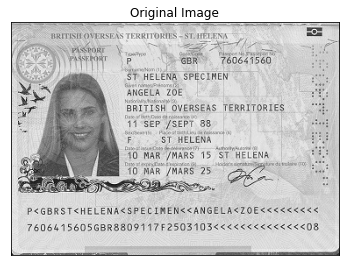

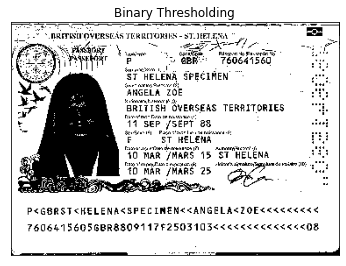

In [2]:
img = cv2.imread('britishp.jpg',0)
## apply binary thresholding
ret,thresh1 = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
## plot original and binarised image 
titles = ['Original Image', 'Binary Thresholding']
images = [img, thresh1]
for i in range(2):
    plt.figure(figsize=(20,20))
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

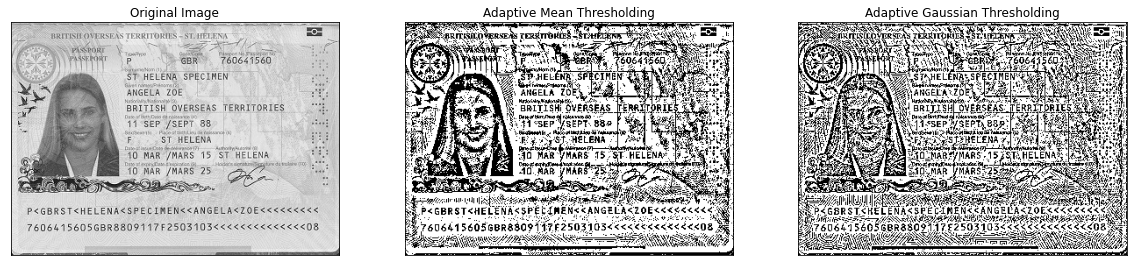

In [19]:
img = cv2.imread('britishp.jpg', 0)

## apply adaptive thresholding 

## adaptive mean thresholding 

th1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,

            cv2.THRESH_BINARY,15,2)

## adaptive gaussian thresholding

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,

            cv2.THRESH_BINARY,11,2)

## plot original and binarised image 

titles = ['Original Image', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2]

plt.figure(figsize=(20,20))

for i in range(3):

    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)

    plt.title(titles[i])

    plt.xticks([]),plt.yticks([])

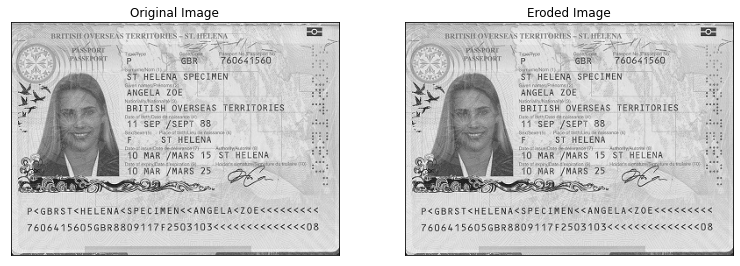

In [11]:
img = cv2.imread('britishp.jpg', 0)
## apply erosion
kernel = np.ones((1,1),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 11)
## plot original and eroded image
titles = ["Original Image", "Eroded Image"]
images = [img, erosion]
plt.figure(figsize=(20,20))
for i in range(2):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

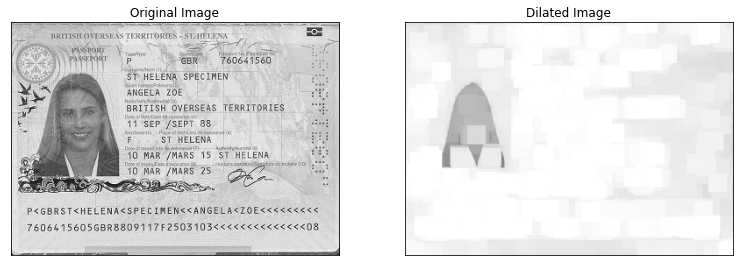

In [13]:
img = cv2.imread('britishp.jpg', 0)
## apply dilation
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 10)
## plot original and dilated image
titles = ["Original Image", "Dilated Image"]
images = [img, dilation]
plt.figure(figsize=(20,20))
for i in range(2):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

In [14]:
from PIL import Image

black = (0,0,0)
white = (255,255,255)
threshold = (130,130,130)

# Open input image in grayscale mode and get its pixels.
img = Image.open("britishp.jpg").convert("LA")
pixels = img.getdata()

newPixels = []

# Compare each pixel 
for pixel in pixels:
    if pixel < threshold:
        newPixels.append(black)
    else:
        newPixels.append(white)

# Create and save new image.
newImg = Image.new("RGB",img.size)
newImg.putdata(newPixels)
#newImg.save("newImage.jpg")

In [16]:
# Image IO
from PIL import Image

# Morphological filtering
from skimage.morphology import opening
from skimage.morphology import disk

# Data handling
import numpy as np

# Connected component filtering
import cv2

black = 0
white = 255
threshold = 160

# Open input image in grayscale mode and get its pixels.
img = Image.open("britishp.jpg").convert("LA")
pixels = np.array(img)[:,:,0]

# Remove pixels above threshold
pixels[pixels > threshold] = white
pixels[pixels < threshold] = black


# Morphological opening
blobSize = 1 # Select the maximum radius of the blobs you would like to remove
structureElement = disk(blobSize)  # you can define different shapes, here we take a disk shape
# We need to invert the image such that black is background and white foreground to perform the opening
pixels = np.invert(opening(np.invert(pixels), structureElement))


# Create and save new image.
newImg = Image.fromarray(pixels).convert('RGB')
newImg.save("newImage1.PNG")

# Find the connected components (black objects in your image)
# Because the function searches for white connected components on a black background, we need to invert the image
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(pixels), connectivity=8)

# For every connected component in your image, you can obtain the number of pixels from the stats variable in the last
# column. We remove the first entry from sizes, because this is the entry of the background connected component
sizes = stats[1:,-1]
nb_components -= 1

# Define the minimum size (number of pixels) a component should consist of
minimum_size = 100

# Create a new image
newPixels = np.ones(pixels.shape)*255

# Iterate over all components in the image, only keep the components larger than minimum size
for i in range(1, nb_components):
    if sizes[i] > minimum_size:
        newPixels[output == i+1] = 0

# Create and save new image.
newImg = Image.fromarray(newPixels).convert('RGB')
newImg.save("newImage2.PNG")

In [1]:
import os
import easyocr
import cv2
reader = easyocr.Reader(["en"])

/home/robin/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
img = cv2.imread("nzpassport.png")
dst2 = cv2.fastNlMeansDenoisingColored(img,None,6,6,7,21)

all_text = []

result = reader.readtext(img,paragraph=False)
#print(result)
for (bbox,text,prob) in result:
    (t1,tr,br,b1) = bbox

    t1 = (int(t1[0]), int(t1[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[0]))
    b1 = (int(b1[0]), int(b1[1]))
    
    #Remove non-ASCII characters to display clean text on the image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    print("text",text)
    all_text.append(text)
    

text DIPLOMATC PassrORT
text NEW ZEALAND
text AOTEAROA
text JGRUYVHENUA
text Amoni
text Ttnu
text Jau Uruvha7u
text NZL
text LDQ01148
text WHAKAATURANGA
text FRED
text WIREMU
text John
text NEW
text ZEALAND
text Fan -
text 28
text FEB
text 1964
text TAIHAPE
text 05
text oct
text 2009
text 05
text oct
text 201 4
text DIA
text WLG
text P<nZLWhAKAATURANGA<<FRED<WIREMU<John<<<<<<<<
text Ldo01148<2nzL6402282m1410055<<<<<<<<<<<<<<00


In [3]:
extracted_text = (all_text)

raw_text = ' '.join(extracted_text)

raw_text

'DIPLOMATC PassrORT NEW ZEALAND AOTEAROA JGRUYVHENUA Amoni Ttnu Jau Uruvha7u NZL LDQ01148 WHAKAATURANGA FRED WIREMU John NEW ZEALAND Fan - 28 FEB 1964 TAIHAPE 05 oct 2009 05 oct 201 4 DIA WLG P<nZLWhAKAATURANGA<<FRED<WIREMU<John<<<<<<<< Ldo01148<2nzL6402282m1410055<<<<<<<<<<<<<<00'

In [4]:
img1 = cv2.imread("britishp.jpg")
blur = cv2.GaussianBlur(img1, (3,3),0)
#dst = cv2.fastNlMeansDenoisingColored(img1,None,6,6,7,21)

result = reader.readtext(img1,paragraph=False)

all_txt = []

for (bbox,text,prob) in result:
    (t1,tr,br,b1) = bbox

    t1 = (int(t1[0]), int(t1[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[0]))
    b1 = (int(b1[0]), int(b1[1]))

    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_txt.append(text)
    
ext_txt = (all_txt)

raw_txt = ' '.join(ext_txt)

raw_txt

'TFREITNLIS GBR 760621560 St HELENA SPECIMEN ANGELA BRITISH OVERSEAS TERRITORIES 017"SEP SEP St HELENA 10 MAR /MARS HELENA 10 MAR /MARS 25 P<GBRST<HE ENA<SPEC IMEN<<ANGELA<ZOE<<<<<<<<< 7606415605G8R8809117F2503103<<<<<<<<<<<<<<08'

In [6]:
pat = "\d{9} "

pat1 = "\D{8}|\D{9}"

pat3 = "\w{2}\d{6}|\w{2}\d{7}|\w{3}\d{5}|\w{3}\d{6}"

In [8]:
import re


def pass_no(str):
    array = re.findall(pat3, str)
    return array

pass_no(raw_text)[0]

'LDQ01148'

In [9]:
def passport_no(str):
    patt = "\d{8}|d{9}|\w{2}\d{6}|\w{2}\d{7}|\w{3}\d{5}|\w{3}\d{6}"
    pass_no = re.findall(patt,str)
    
    return pass_no[0]

In [10]:
passport_no(raw_txt)

'76062156'

In [11]:
passport_no(raw_text)

'LDQ01148'

In [138]:
patt = "\d{9}|\w{2}\d{6}|\w{2}\d{7}|\w{3}\d{5}|\w{3}\d{6}"

In [139]:
pass_no = re.findall(patt,raw_txt)

In [140]:
p_n = pass_no[0]
p_n

'760621560'

In [12]:
raw_txt

'TFREITNLIS GBR 760621560 St HELENA SPECIMEN ANGELA BRITISH OVERSEAS TERRITORIES 017"SEP SEP St HELENA 10 MAR /MARS HELENA 10 MAR /MARS 25 P<GBRST<HE ENA<SPEC IMEN<<ANGELA<ZOE<<<<<<<<< 7606415605G8R8809117F2503103<<<<<<<<<<<<<<08'

In [13]:
raw_text

'DIPLOMATC PassrORT NEW ZEALAND AOTEAROA JGRUYVHENUA Amoni Ttnu Jau Uruvha7u NZL LDQ01148 WHAKAATURANGA FRED WIREMU John NEW ZEALAND Fan - 28 FEB 1964 TAIHAPE 05 oct 2009 05 oct 201 4 DIA WLG P<nZLWhAKAATURANGA<<FRED<WIREMU<John<<<<<<<< Ldo01148<2nzL6402282m1410055<<<<<<<<<<<<<<00'

In [14]:
pass_type = all_text[-2].replace("<", " ")[0]

In [15]:
pass_type

'P'

In [16]:
n = all_text[-2].split(pass_type)[1].replace("<"," ")
n

' nZLWhAKAATURANGA  FRED WIREMU John        '

In [18]:
total_name = n[4:]
total_name

'WhAKAATURANGA  FRED WIREMU John        '

In [30]:
f_name = total_name.split(" ")[0]
f_name

'WhAKAATURANGA'

In [38]:
given_name = total_name.split(f_name)[1]
given_name = given_name.rstrip()
given_name = given_name.lstrip()


In [39]:
given_name

'FRED WIREMU John'

In [49]:
date_pat = "[0-9]{2} \w{3} \d{4}|\d{2} \w{3} \d{3} \d{1}"

In [50]:
re.findall(date_pat,raw_text)

['28 FEB 1964', '05 oct 2009', '05 oct 201 4']

In [51]:
all_date = re.findall(date_pat,raw_text)
all_date

['28 FEB 1964', '05 oct 2009', '05 oct 201 4']

In [58]:
def get_all_date(str):
    
    date_pat = "[0-9]{2} \w{3} \d{4}|\d{2} \w{3} \d{3} \d{1}"
    all_date =  re.findall(date_pat,str)

    
    return all_date

In [68]:
birth_date = get_all_date(raw_text)[0]
issue_date = get_all_date(raw_text)[1]

In [69]:
birth_date, issue_date

('28 FEB 1964', '05 oct 2009')

In [73]:
place = raw_text.split(birth_date)

In [77]:
birth_place = place[1].split(issue_date)[0]
birth_place = birth_place.lstrip()
birth_place = birth_place.rstrip()
birth_place

'TAIHAPE'

In [99]:
nat = raw_text.split(given_name)[1]
nationality = nat.split(birth_date)[0]
nationality = nationality.rstrip()
nationality = nationality.lstrip()
nationality

'NEW ZEALAND Fan -'

In [100]:
info = {}

In [101]:
def passport_no(str):
    patt = "\d{8}|d{9}|\w{2}\d{6}|\w{2}\d{7}|\w{3}\d{5}|\w{3}\d{6}"
    pass_no = re.findall(patt,str)
    
    return pass_no[0]

In [102]:
pass_no = passport_no(raw_text)

In [103]:
info["passport_no"] = pass_no

In [105]:
pass_type = all_text[-2].replace("<", " ")[0]
info["passport_type"] = pass_type

name_text = all_text[-2].split(pass_type)[1].replace("<"," ")
total_name = n[4:]

first_name = total_name.split(" ")[0]
given_name = total_name.split(f_name)[1]
given_name = given_name.rstrip()
given_name = given_name.lstrip()
info["Surname"] = first_name
info["Given Name"] = given_name


In [107]:
def get_all_date(str):
    
    date_pat = "[0-9]{2} \w{3} \d{4}|\d{2} \w{3} \d{3} \d{1}"
    all_date =  re.findall(date_pat,str)
    
    return all_date

In [110]:
def get_nationality(str):
    
    nat = str.split(given_name)[1]
    nationality = nat.split(birth_date)[0]
    nationality = nationality.rstrip()
    nationality = nationality.lstrip()
    
    return nationality

In [108]:
birth_date = get_all_date(raw_text)[0]
issue_date = get_all_date(raw_text)[1]
expiry_date = get_all_date(raw_text)[-1]

info["Date Of Birth"] = birth_date
info["Date Of Isuue"] = issue_date
info["Date Of Expiry"] = expiry_date

In [113]:
def get_birth_plc(str):
    
    place = str.split(birth_date)
    birth_place = place[1].split(issue_date)[0]
    birth_place = birth_place.lstrip()
    birth_place = birth_place.rstrip()
    
    return birth_place

In [114]:
birth_plc = get_birth_plc(raw_text)
info["Place Of Birth"] = birth_plc

In [111]:
nationality = get_nationality(raw_text)
info["Nationality"] = nationality

In [115]:
info

{'passport_no': 'LDQ01148',
 'passport_type': 'P',
 'Surname': 'WhAKAATURANGA',
 'Given Name': 'FRED WIREMU John',
 'Date Of Birth': '28 FEB 1964',
 'Date Of Isuue': '05 oct 2009',
 'Date Of Expiry': '05 oct 201 4',
 'Nationality': 'NEW ZEALAND Fan -',
 'Place Of Birth': 'TAIHAPE'}